In [1]:
# Copyright 2023 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Multimodal retail recommendation: using Gemini to recommend items based on images and image reasoning

<table align="left">
  <td style="text-align: center">
    <a href="https://colab.research.google.com/github/GoogleCloudPlatform/generative-ai/blob/main/gemini/use-cases/retail/multimodal_retail_recommendations.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/colab-logo-32px.png" alt="Google Colaboratory logo"><br> Run in Colab
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/colab/import/https:%2F%2Fraw.githubusercontent.com%2FGoogleCloudPlatform%2Fgenerative-ai%2Fmain%2Fgemini%2Fuse-cases%2Fretail%2Fmultimodal_retail_recommendations.ipynb">
      <img width="32px" src="https://lh3.googleusercontent.com/JmcxdQi-qOpctIvWKgPtrzZdJJK-J3sWE1RsfjZNwshCFgE_9fULcNpuXYTilIR2hjwN" alt="Google Cloud Colab Enterprise logo"><br> Run in Colab Enterprise
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/workbench/deploy-notebook?download_url=https://raw.githubusercontent.com/GoogleCloudPlatform/generative-ai/main/gemini/use-cases/retail/multimodal_retail_recommendations.ipynb">
      <img src="https://lh3.googleusercontent.com/UiNooY4LUgW_oTvpsNhPpQzsstV5W8F7rYgxgGBD85cWJoLmrOzhVs_ksK_vgx40SHs7jCqkTkCk=e14-rj-sc0xffffff-h130-w32" alt="Vertex AI logo"><br> Open in Vertex AI Workbench
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/use-cases/retail/multimodal_retail_recommendations.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/github-logo-32px.png" alt="GitHub logo"><br> View on GitHub
    </a>
  </td>
</table>

<div style="clear: both;"></div>

<b>Share to:</b>

<a href="https://www.linkedin.com/sharing/share-offsite/?url=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/use-cases/retail/multimodal_retail_recommendations.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/8/81/LinkedIn_icon.svg" alt="LinkedIn logo">
</a>

<a href="https://bsky.app/intent/compose?text=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/use-cases/retail/multimodal_retail_recommendations.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/7/7a/Bluesky_Logo.svg" alt="Bluesky logo">
</a>

<a href="https://twitter.com/intent/tweet?url=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/use-cases/retail/multimodal_retail_recommendations.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/5/53/X_logo_2023_original.svg" alt="X logo">
</a>

<a href="https://reddit.com/submit?url=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/use-cases/retail/multimodal_retail_recommendations.ipynb" target="_blank">
  <img width="20px" src="https://redditinc.com/hubfs/Reddit%20Inc/Brand/Reddit_Logo.png" alt="Reddit logo">
</a>

<a href="https://www.facebook.com/sharer/sharer.php?u=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/use-cases/retail/multimodal_retail_recommendations.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/5/51/Facebook_f_logo_%282019%29.svg" alt="Facebook logo">
</a>            


| | |
|-|-|
|Author(s) | [Thu Ya Kyaw](https://github.com/iamthuya) |

## Overview

For retail companies, recommendation systems improve customer experience and thus can increase sales.

This notebook shows how you can use the multimodal capabilities of Gemini 1.5 Pro model to rapidly create a multimodal recommendation system out-of-the-box.

## Scenario

The customer shows you their living room:

|Customer photo |
|:-----:|
|<img src="https://storage.googleapis.com/github-repo/img/gemini/retail-recommendations/rooms/spacejoy-c0JoR_-2x3E-unsplash.jpg" width="80%">  |



Below are four chair options that the customer is trying to decide between:

|Chair 1| Chair 2 | Chair 3 | Chair 4 |
|:-----:|:----:|:-----:|:----:|
| <img src="https://storage.googleapis.com/github-repo/img/gemini/retail-recommendations/furnitures/cesar-couto-OB2F6CsMva8-unsplash.jpg" width="80%">|<img src="https://storage.googleapis.com/github-repo/img/gemini/retail-recommendations/furnitures/daniil-silantev-1P6AnKDw6S8-unsplash.jpg" width="80%">|<img src="https://storage.googleapis.com/github-repo/img/gemini/retail-recommendations/furnitures/ruslan-bardash-4kTbAMRAHtQ-unsplash.jpg" width="80%">|<img src="https://storage.googleapis.com/github-repo/img/gemini/retail-recommendations/furnitures/scopic-ltd-NLlWwR4d3qU-unsplash.jpg" width="80%">|


How can you use Gemini 1.5 Pro, a multimodal model, to help the customer choose the best option, and also explain why?

### Objectives

Your main objective is to learn how to create a recommendation system that can provide both recommendations and explanations using a multimodal model: Gemini 1.5 Pro.

In this notebook, you will begin with a scene (e.g. a living room) and use the Gemini 1.5 Pro model to perform visual understanding. You will also investigate how the Gemini Pro model can be used to recommend an item (e.g. a chair) from a list of furniture items as input.

By going through this notebook, you will learn:
- how to use the Gemini Pro model to perform visual understanding
- how to take multimodality into consideration in prompting for the Gemini Pro model
- how the Gemini Pro model can be used to create retail recommendation applications out-of-the-box

### Costs
This tutorial uses billable components of Google Cloud:

- Vertex AI

Learn about [Vertex AI pricing](https://cloud.google.com/vertex-ai/pricing) and use the [Pricing Calculator](https://cloud.google.com/products/calculator/) to generate a cost estimate based on your projected usage.

## Getting Started

### Install Vertex AI SDK for Python

In [2]:
%pip install --upgrade --user google-cloud-aiplatform

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 55.5 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


### Restart current runtime

To use the newly installed packages in this Jupyter runtime, you must restart the runtime. You can do this by running the cell below, which will restart the current kernel.

In [3]:
# Restart kernel after installs so that your environment can access the new packages
import IPython

app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

<div class="alert alert-block alert-warning">
<b>⚠️ The kernel is going to restart. Please wait until it is finished before continuing to the next step. ⚠️</b>
</div>


### Authenticate your notebook environment (Colab only)

If you are running this notebook on Google Colab, run the following cell to authenticate your environment. This step is not required if you are using [Vertex AI Workbench](https://cloud.google.com/vertex-ai-workbench).

In [1]:
import sys

# Additional authentication is required for Google Colab
if "google.colab" in sys.modules:
    # Authenticate user to Google Cloud
    from google.colab import auth

    auth.authenticate_user()

### Define Google Cloud project information and initialize Vertex AI

Initialize the Vertex AI SDK for Python for your project:

In [2]:
# Define project information
PROJECT_ID = "qwiklabs-gcp-04-20cfa2ff6ab0"  # @param {type:"string"}
LOCATION = "us-east4"  # @param {type:"string"}

# Initialize Vertex AI
import vertexai

vertexai.init(project=PROJECT_ID, location=LOCATION)

### Import libraries

In [3]:
from vertexai.generative_models import GenerativeModel, Image

## Using Gemini 1.5 Pro model

The Gemini 1.5 Pro model `gemini-1.5-pro` is a multimodal model that supports adding image and video in text or chat prompts for a text response.

### Load Gemini 1.5 Pro model

In [4]:
multimodal_model = GenerativeModel("gemini-1.5-pro")

### Define helper functions

In [5]:
import http.client
import io
import typing
import urllib.request

import IPython.display
from PIL import Image as PIL_Image
from PIL import ImageOps as PIL_ImageOps


def display_image(image: Image, max_width: int = 600, max_height: int = 350) -> None:
    pil_image = typing.cast(PIL_Image.Image, image._pil_image)
    if pil_image.mode != "RGB":
        # Modes such as RGBA are not yet supported by all Jupyter environments
        pil_image = pil_image.convert("RGB")
    image_width, image_height = pil_image.size
    if max_width < image_width or max_height < image_height:
        # Resize to display a smaller notebook image
        pil_image = PIL_ImageOps.contain(pil_image, (max_width, max_height))
    display_image_compressed(pil_image)


def display_image_compressed(pil_image: PIL_Image.Image) -> None:
    image_io = io.BytesIO()
    pil_image.save(image_io, "jpeg", quality=80, optimize=True)
    image_bytes = image_io.getvalue()
    ipython_image = IPython.display.Image(image_bytes)
    IPython.display.display(ipython_image)


def get_image_bytes_from_url(image_url: str) -> bytes:
    with urllib.request.urlopen(image_url) as response:
        response = typing.cast(http.client.HTTPResponse, response)
        if response.headers["Content-Type"] not in ("image/png", "image/jpeg"):
            raise Exception("Image can only be in PNG or JPEG format")
        image_bytes = response.read()
    return image_bytes


def load_image_from_url(image_url: str) -> Image:
    image_bytes = get_image_bytes_from_url(image_url)
    return Image.from_bytes(image_bytes)


def print_multimodal_prompt(contents: list):
    """
    Given contents that would be sent to Gemini,
    output the full multimodal prompt for ease of readability.
    """
    for content in contents:
        if isinstance(content, Image):
            display_image(content)
        else:
            print(content)

### Visual understanding with Gemini 1.5 Pro

Here you will ask the Gemini 1.5 Pro model to describe a room in details from its image. To do that you have to **combine text and image in a single prompt**.

-------Prompt--------
Describe what's visible in this room and the overall atmosphere:


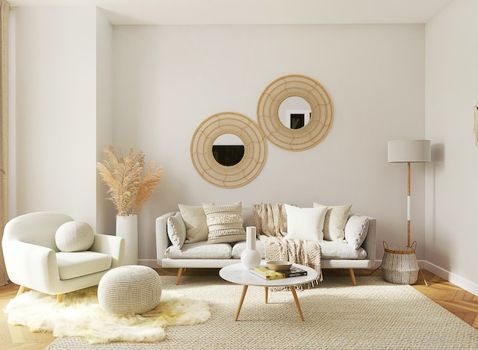


-------Response--------
The image shows a tastefully decorated living room bathed in natural light. The walls are a calm, neutral shade, setting a serene atmosphere.  Two round rattan mirrors with different sizes hang side by side, adding a touch of boho chic. Below them sits a light-colored sofa adorned with a variety of comfy throw pillows in beige and cream hues. A knitted blanket casually drapes over the sofa, enhancing the cozy vibe. 

A round coffee table with wooden legs sits in front of the sofa, home to a stylish vase and a stack of books. To the side, a tall floor lamp with a fabric shade provides warm lighting. A woven basket near the lamp adds to the natural, textured aesthetic.

To the left, a plush armchair beckons relaxation, complemented by a matching ottoman. A vase filled with tall, dried grasses adds a touch of organic elegance. The entire space is tied together by a large, textured rug in a natural hue, completing the inviting and sophisticated ambiance of the room

In [6]:
# urls for room images
room_image_url = "https://storage.googleapis.com/github-repo/img/gemini/retail-recommendations/rooms/spacejoy-c0JoR_-2x3E-unsplash.jpg"

# load room images as Image Objects
room_image = load_image_from_url(room_image_url)

prompt = "Describe what's visible in this room and the overall atmosphere:"
contents = [
    prompt,
    room_image,
]

responses = multimodal_model.generate_content(contents, stream=True)

print("-------Prompt--------")
print_multimodal_prompt(contents)

print("\n-------Response--------")
for response in responses:
    print(response.text, end="")

### Generating open recommendations based on built-in knowledge

Using the same image, you can ask the model to recommend **a piece of furniture** that would fit in it alongside with the description of the room.

Note that the model can choose **any furniture** to recommend in this case, and can do so from its only built-in knowledge.

-------Prompt--------
Recommend a new piece of furniture for this room:


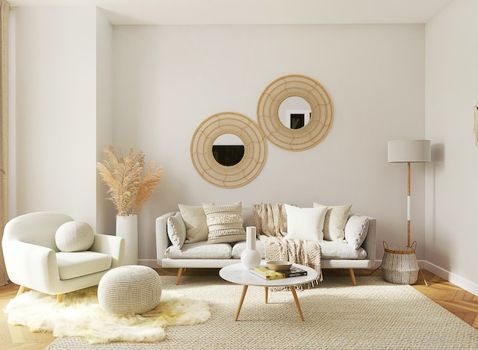

and explain the reason in detail

-------Response--------
A great addition to this room would be a **woven blanket ladder**. 

Here's why:

* **Style Harmony:** The room has a distinct boho-chic aesthetic, characterized by the natural textures (rattan mirrors, jute rug, woven throw), neutral color palette, and relaxed vibe. A blanket ladder, especially one made from bamboo or light-toned wood, would complement this style perfectly. 
* **Functionality:**  While stylish, the room lacks a sense of practicality. A blanket ladder provides storage and display options. You could drape extra throws on it, hang decorative blankets, or even use it to air out throws during warmer months. 
* **Visual Interest:** The room is relatively symmetrical, with the mirrors and the sofa arrangement.  A slightly asymmetrical element like a blanket ladder, placed on either side of the room, would add visual intrigue without disrupting the balanced feel.
* **Openness:** The furniture is currently low-profile, 

In [7]:
prompt1 = "Recommend a new piece of furniture for this room:"
prompt2 = "and explain the reason in detail"
contents = [prompt1, room_image, prompt2]

responses = multimodal_model.generate_content(contents, stream=True)

print("-------Prompt--------")
print_multimodal_prompt(contents)

print("\n-------Response--------")
for response in responses:
    print(response.text, end="")

In the next cell, you will ask the model to recommend **a type of chair** that would fit in it alongside with the description of the room.

Note that the model can choose **any type of chair** to recommend in this case.

-------Prompt--------
Describe this room:


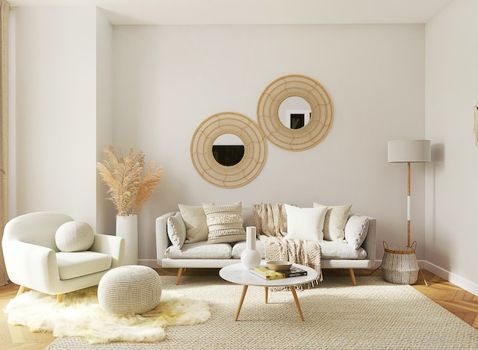

and recommend a type of chair that would fit in it

-------Response--------
This room is a serene and inviting living space decorated in a modern bohemian style. It features:

* **Neutral Color Palette:** The walls are painted in a warm off-white, creating a calming backdrop for the furnishings and decor. 
* **Natural Textures:** The room incorporates natural elements through the use of a woven rug, wicker mirrors, a linen couch, and dried pampas grass in a vase.  
* **Minimalist Furniture:**  The furniture is simple and modern, with clean lines and a light and airy feel. The cream-colored sofa is paired with a matching armchair, a round coffee table, and a slender floor lamp. 
* **Bohemian Accents:**  The bohemian touches come through in the throw pillows with geometric patterns, the throw blanket draped casually over the sofa, and the woven basket. 

**Chair Recommendation:**

A rattan peacock chair would be a perfect fit for this room. Its natural material and bohemian design would 

In [8]:
prompt1 = "Describe this room:"
prompt2 = "and recommend a type of chair that would fit in it"
contents = [prompt1, room_image, prompt2]

responses = multimodal_model.generate_content(contents, stream=True)

print("-------Prompt--------")
print_multimodal_prompt(contents)

print("\n-------Response--------")
for response in responses:
    print(response.text, end="")

### Generating recommendations based on provided images

Instead of keeping the recommendation open, you can also provide a list of items for the model to choose from. Here you will download a few chair images and set them as options for the Gemini model to recommend from. This is particularly useful for retail companies who want to provide recommendations to users based on the kind of room they have, and the available items that the store offers.

In [ ]:
# Download and display sample chairs
furniture_image_urls = [
    "https://storage.googleapis.com/github-repo/img/gemini/retail-recommendations/furnitures/cesar-couto-OB2F6CsMva8-unsplash.jpg",
    "https://storage.googleapis.com/github-repo/img/gemini/retail-recommendations/furnitures/daniil-silantev-1P6AnKDw6S8-unsplash.jpg",
    "https://storage.googleapis.com/github-repo/img/gemini/retail-recommendations/furnitures/ruslan-bardash-4kTbAMRAHtQ-unsplash.jpg",
    "https://storage.googleapis.com/github-repo/img/gemini/retail-recommendations/furnitures/scopic-ltd-NLlWwR4d3qU-unsplash.jpg",
]

# Load furniture images as Image Objects
furniture_images = [load_image_from_url(url) for url in furniture_image_urls]

# To recommend an item from a selection, you will need to label the item number within the prompt.
# That way you are providing the model with a way to reference each image as you pose a question.
# Labelling images within your prompt also help to reduce hallucinations and overall produce better results.
contents = [
    "Consider the following chairs:",
    "chair 1:",
    furniture_images[0],
    "chair 2:",
    furniture_images[1],
    "chair 3:",
    furniture_images[2],
    "chair 4:",
    furniture_images[3],
    "room:",
    room_image,
    "You are an interior designer. For each chair, explain whether it would be appropriate for the style of the room:",
]

responses = multimodal_model.generate_content(contents, stream=True)

print("-------Prompt--------")
print_multimodal_prompt(contents)

print("\n-------Response--------")
for response in responses:
    print(response.text, end="")

You can also return the responses in JSON format, to make it easier to plug recommendations into a recommendation system:

In [ ]:
contents = [
    "Consider the following chairs:",
    "chair 1:",
    furniture_images[0],
    "chair 2:",
    furniture_images[1],
    "chair 3:",
    furniture_images[2],
    "chair 4:",
    furniture_images[3],
    "room:",
    room_image,
    "You are an interior designer. Return in JSON, for each chair, whether it would fit in the room, with an explanation:",
]

responses = multimodal_model.generate_content(contents, stream=True)

print("-------Prompt--------")
print_multimodal_prompt(contents)

print("\n-------Response--------")
for response in responses:
    print(response.text, end="")

## Conclusion

This notebook showed how you can easily build a multimodal recommendation system using Gemini for furniture, but you can also use the similar approach in:

- recommending clothes based on an occasion or an image of the venue
- recommending wallpaper based on the room and settings

You may also want to explore how you can build a RAG (retrieval-augmented generation) system where you retrieve relevant images from your store inventory to users who can they use Gemini to help identify the most ideal choice from the various options provided, and also explain the rationale to users.